# Week 3 Multivariate Statistics- Part I

## 0.0.0 Action Load Basic Libaries

In [221]:
%matplotlib inline


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio


#configure the plotting defaluts
plt.rcParams['figure.figsize'] = [15.256 , 6.024]
plt.rcParams['figure.dpi'] = 125 

In [222]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/2022_SFC_IDSP/datasets/'


results_path='/content/drive/My Drive/2022_SFC_IDSP/Week_3/'

Mounted at /content/drive/


## 1.0  Exploring Normal Distributions using Histograms

One of the most common tools used to represet distribtions of data is a histogram. This shows one way of visulaising the spread in the data, by placing overvations into bins, a form of **categorization**. 

Many will create a quick histgram of data, and then report the summary statistics.  Here, I am going to start exploring some stratagies for going a little deeper and questioning why you do what you do.

To start with we need some data.


#### 1.0.1 Action one load and describe data

a) load the 'Wk3_mpg_data.csv'.  This is another reduced version of the full fuel economy data set.  I have built it so that we can examine some trends a few select columns.

b) produce the summary statistics

In [223]:
simple_mpg=pd.read_csv(data_path + 'Wk3_mpg_data.csv')



### Examine the data


|index|year|city08|highway08|co2TailpipeAGpm|co2TailpipeGpm|cylinders|displ|
|---|---|---|---|---|---|---|---|
|count|44787\.0|44787\.0|44787\.0|44787\.0|44787\.0|44787\.0|44787\.0|
|mean|2003\.1289659945967|18\.876973228838725|24\.958157501060576|16\.889944933301937|459\.8436374955651|5\.6635630875030705|3\.2567240493893266|
|std|11\.94775043715565|9\.5066722315451|8\.818173489974875|91\.66955010490933|126\.75836130312298|1\.8356449753106645|1\.3844278691926684|
|min|1984\.0|6\.0|9\.0|0\.0|0\.0|0\.0|0\.0|
|25%|1992\.0|15\.0|20\.0|0\.0|386\.39130434782606|4\.0|2\.1|
|50%|2004\.0|17\.0|24\.0|0\.0|444\.35|6\.0|3\.0|
|75%|2014\.0|21\.0|28\.0|0\.0|522\.7647058823529|6\.0|4\.2|
|max|2023\.0|150\.0|133\.0|713\.0|1269\.571428571429|16\.0|8\.4|



From the high level summary statistics table above (either here or via your code) see that only 7 of the columns in their current form produce summary statistics. The remianing columns can be thought of as catagorical. (while they hold text values, these are a set number of values- or catagories)

At this point it makes sense to plot the data. Last week I had you work though each plot manually retypring and trying things out. The point of learning to perform this analysis in python is to do this more automatically.

We want a way to systematically examine the distributions of these remaining columns. 

The good news is that you can do this simply by just typeing the line of code below (example 1.0.2), but this is a high level function. And we will use it here so we can zero in on a dataset to explore histograms and normal distributions.   


#### 1.0.2 Example plot array of numeric columns 

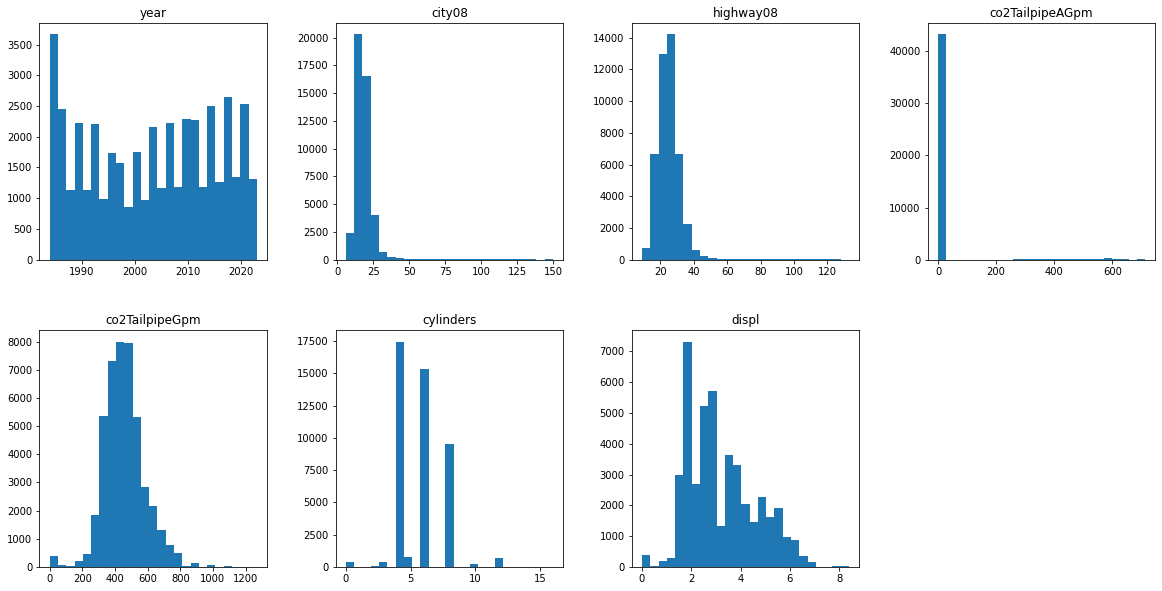

In [ ]:

ax=simple_mpg.hist(layout=(2,4),bins=25, grid=False, figsize=(20,10))

From the above array of figures, i am going to zero in on the 'co2TailpipeGpm' data set.  You will get to repeat this analysis on one of the other columns of your choice.

First let's just plot the column histogram with 25 bins as in the example below.
**Question** Why 25 bins?

**Answer**  It was a place to start. We will explore this at depth below and see if our selection of bins effects our understanding of the data.

#### 1.0.3 Example of a histogram.

**note** I have given this plot a dummy variable name 'ax'.  From a presintation point of view this cleans up the inline plot a little bit. also makes saveing the plot easier.

In [224]:
emissions=simple_mpg['co2TailpipeGpm'].copy()
emissions

0        423.190476
1        807.909091
2        329.148148
3        807.909091
4        467.736842
            ...    
44782    403.954545
44783    386.391304
44784    423.190476
44785    423.190476
44786    493.722222
Name: co2TailpipeGpm, Length: 44787, dtype: float64

Text(0, 0.5, 'Counts')

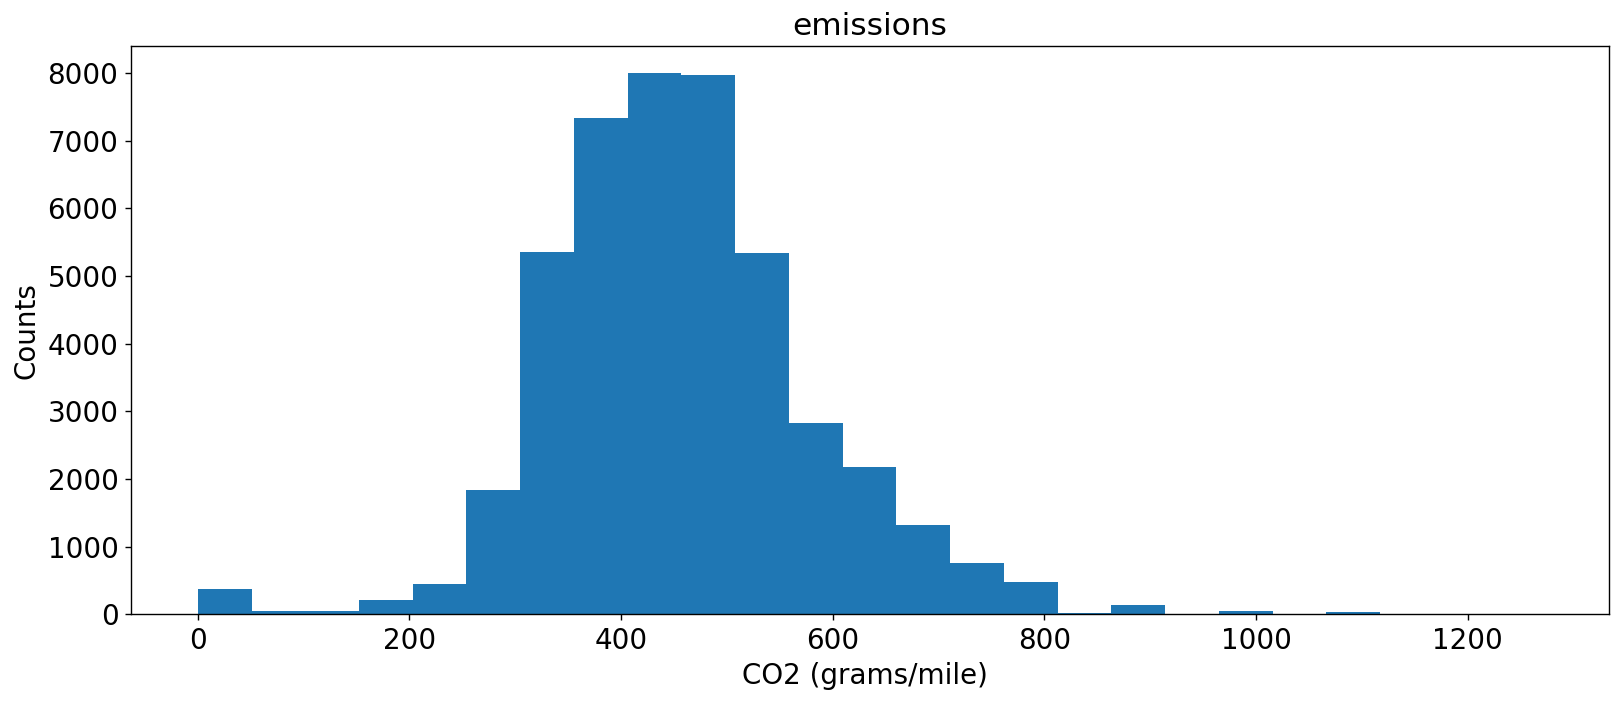

In [ ]:
ax=emissions.hist(bins=25, grid=False, ylabelsize=16, xlabelsize=16)
ax.set_title('emissions', fontsize=18)
ax.set_xlabel('CO2 (grams/mile) ',fontsize=16)
ax.set_ylabel('Counts', fontsize =16)

### 1.1.0 The Normal Distribution - Parametric descriptors (Mean and Standard Deviation)

Casual inspection of the above data shows that is looks like what we would expect from a normal distribution. I.E. the classic bell curve of a peak in the with tails to either side. 

This distribution is given by the equation:

\begin{equation}
f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}
\end{equation}

The equation above possess only two parameters:
* the **mean** given by $μ$, and 
* the **standard deviation** givenby $\sigma$ . 
* **varience** of a dataset is given by $\sigma^2$  .

Useing these two parameters if you input a value for $x$, you will get back a probability of observing that value, or a **percentage**.

This means the outputs are scaled from 0 to 1, and can be seen as the effect of the ${\frac{1}{\sigma {\sqrt{2 \pi}} }}$ term. 

This distribution goes by many names,including the Guassian. SciPy and other stats packages will refer to it by its formal name the **probability density function (PDF)**.

So let's compare a historgram with 25 bins to the 


In [ ]:
print('\u03BC = ', emissions.mean(),'\u03C3 =', emissions.std())

μ =  459.8436374955651 σ = 126.75836130312298


In [5]:
xmin, xmax = emissions.min(),emissions.max()
thy_range = np.linspace(xmin, xmax, 100)

In [6]:
thy_dist=sci.stats.norm.pdf(thy_range,emissions.mean(),emissions.std())

Text(0.5, 1.0, "Fit Values: 'μ = 459.84 and σ = 126.76")

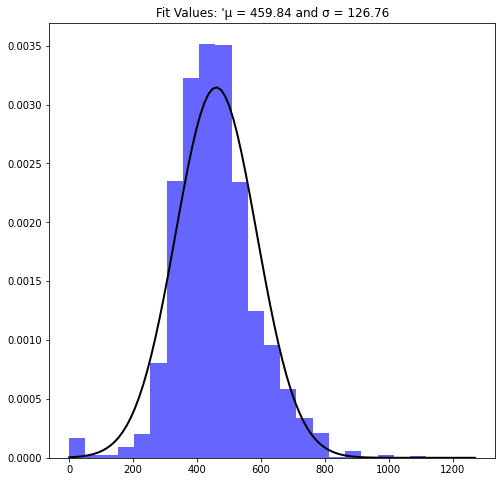

In [ ]:
plt.figure(figsize=(8,8))


plt.hist(emissions,bins=25, density=True, alpha=0.6, color='b')
plt.plot(thy_range,thy_dist,'k', linewidth=2)
title = "Fit Values: '\u03BC = {:.2f} and \u03C3 = {:.2f}".format(emissions.mean(), emissions.std())
plt.title(title)

### 1.2.0 Exploring Histogram Bin Selection with **For** Loops

One of the most common modifications to the default histogram is adjusting the number of bins. This relates to understanding the distribution of data

#### 1.2.1 Examples of for loops using **list comprehension** on arrays and lists

In [ ]:
bin_range=np.arange(10,220,25)

for bin in bin_range:
    print(bin)

10
35
60
85
110
135
160
185
210


In [7]:
bin_range_list=[10,35,100,440,550]

for bin in bin_range_list:
    print(bin)

10
35
100
440
550


In the above examples we demonstread two methods for creating a descrete number of elements for the loop to act across. 

However, both of the opions for generating subplots (```.add_subplots```below or ``` plt.subplots()```) require a sequental set of numeric values which are **iteratable**. 

In our case, the values for the number of bins are not sequental, so if we use those values the subplots are going to not in the order or of the number of plots that we needs. 

Here though we use the Python function ```enumerate```, to transform our oringal list into an iterable object and then use that to create a series of subplots.

In this example we use ```.add_subplots(2,3,i)``` to create an set of subplots which are in 2 row and 3 columns.  The $i$ in this case refers to the iteration of the loop and is determined by the loop count.

#### 1.2.2 Example of using a **for loop** to create a set of subplots in a single figure.

**notice** methods for settign a title on each subplot, as well as the x-axis label.

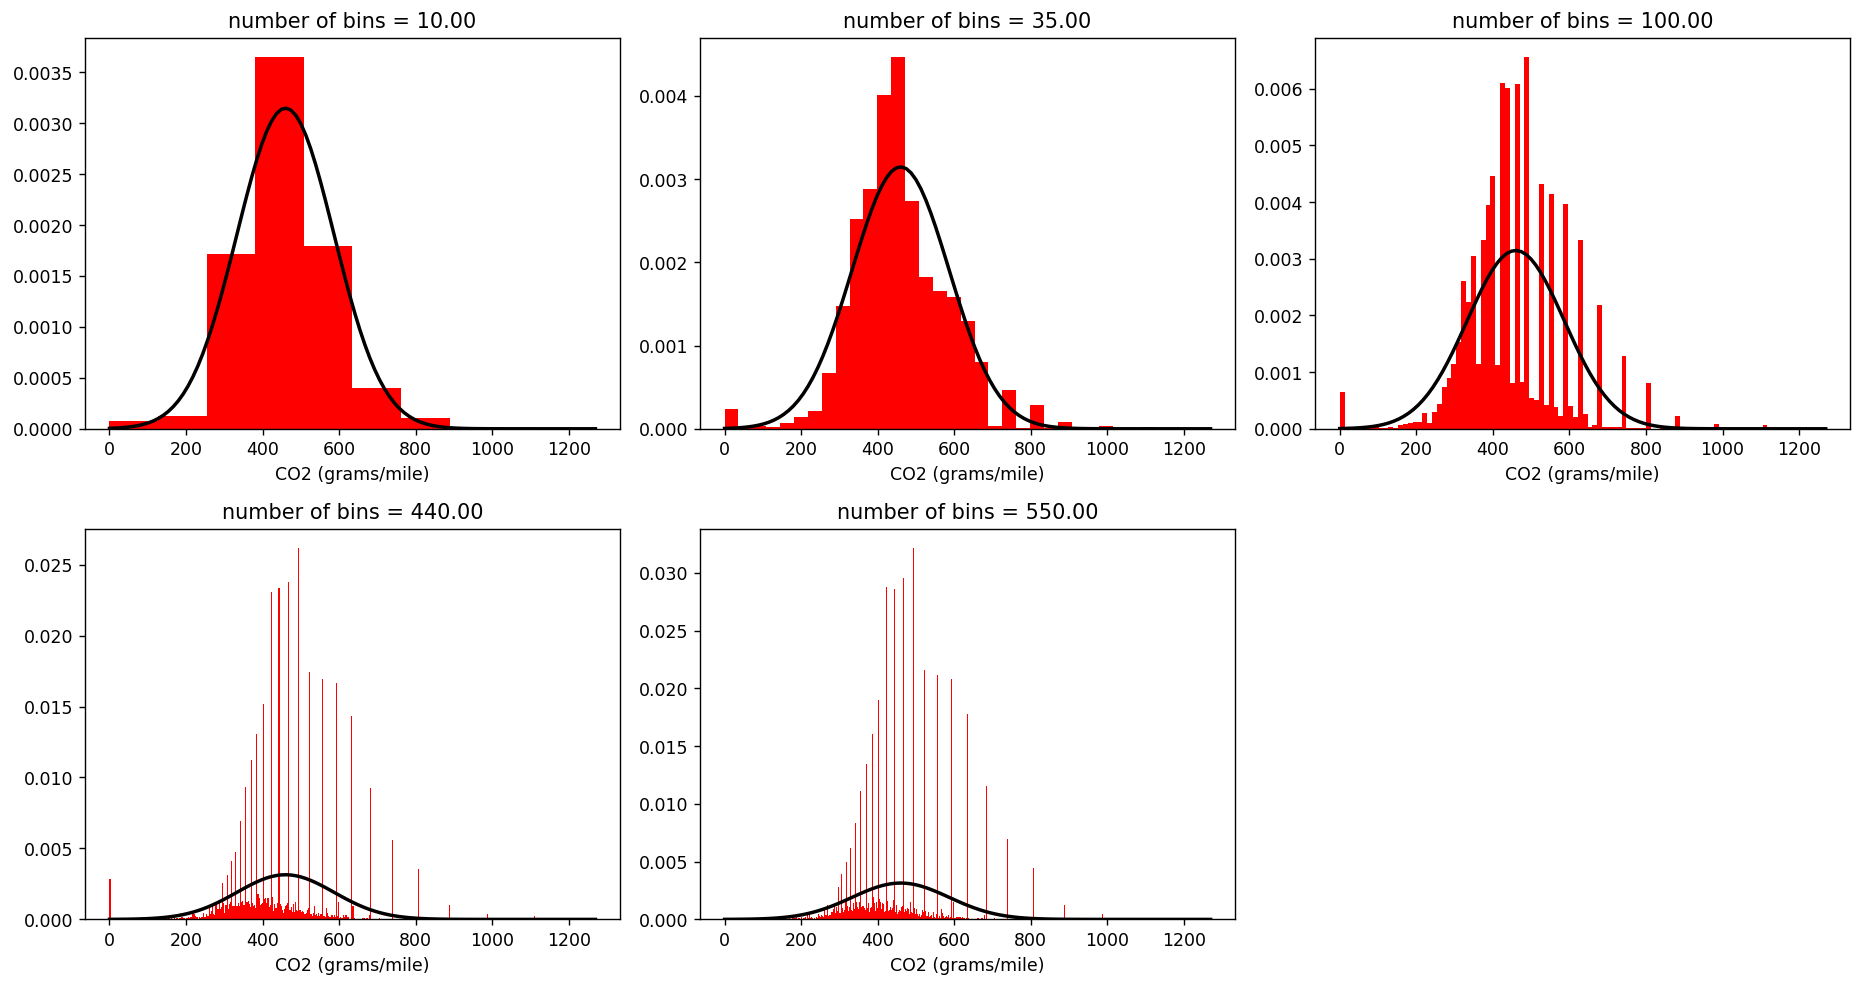

In [ ]:
#note figsize goes width then height
fig = plt.figure(1,figsize=(15,8))
for i, bin in enumerate(bin_range_list,1):
    fig.add_subplot(2,3,i,)
    plt.hist(emissions, bins=bin, density=True, color = 'red')
    plt.plot(thy_range,thy_dist,'k', linewidth=2)
    plt.xlabel('CO2 (grams/mile)')
    plt.title('number of bins = {:.2f}'.format(bin))
plt.tight_layout()
plt.show(1)

### 1.3 Comparing histograms to probability density functions

In the figure below we plot a histogram with bins determined by the squareroot of the total number of counts. We also plot the **parametric** probability dienstiy (derived from the mean, std deviation, max, and min) as well as the **non-parametric** kernal probability desnity estimation (KDE).

**Non-parametric** means, that the density function is based on a best fit of the data. In this way it is data driven, not dictated by fore-knowledge or parametic assumptions.$^*$ 

The KDE curve starts to capture some of the spiky behavior that we are observing in the histogram as we incrase the number of bins. We will explore this in the next section.




---


$^*$ [SciPy function description](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) provides documenttion on how it is calculated as well as futher references on the underlying maths if you are interested.

#### 1.3.1 Example comparing differnt representations of the data distributions

44787 211


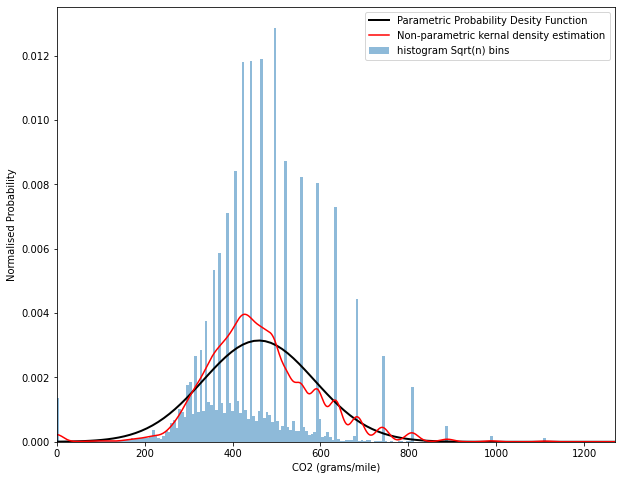

In [ ]:

bin_size=int(len(emissions)**0.5)

print(len(emissions), bin_size)

fig=plt.figure(figsize =(10,8))
#set the range of x values to the max and min of the data
plt.xlim(emissions.min(),emissions.max())

plt.plot(thy_range,thy_dist,'k', linewidth=2)

emissions.plot.kde(color='Red')

plt.hist(emissions, density=True, bins=bin_size, alpha=0.5)

plt.xlabel('CO2 (grams/mile)')
plt.ylabel('Normalised Probability')
plt.legend([ 'Parametric Probability Desity Function','Non-parametric kernal density estimation','histogram Sqrt(n) bins'])

fig.savefig(results_path+'emissions_distribution.png')

#### 1.3.2 Action read the following details on methods for determining number of histogram bins.


https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

#### 1.3.3 Action Create a list where the elemnts of the list are the number of bins for each of the methods above.

*Hint* we created such a list in Example 1.2.1, we did not use these methods to generte the number of bins however.

#### 1.3.4 Action Select either 'city08', 'highway08',or 'displ' to explore and compare the representation of the data distributions between:

* histograms with differnt bin sizes
* parmetric distribution descriptions
* non-parametic distribution descriptions

use sub-plots and for loops to generate a summary figure.

#### 1.3.5 Action Save your summary figure and then share it on the Moodle forum for Week 3.

There will be a thread dedicated to each of the three options. Post your figure there and comment with what you think might be driving any spikey or other non-ideal behavoiur.

[Moodle Forum](https://moodle.gla.ac.uk/mod/forum/view.php?id=2865134)

## 2.0 Comparing populations

From Examples 1.2.2 and 1.3.1 observed that the data has some 'spikes' or other peaks in it. This suggests that there may be several sub-populations with in the data.


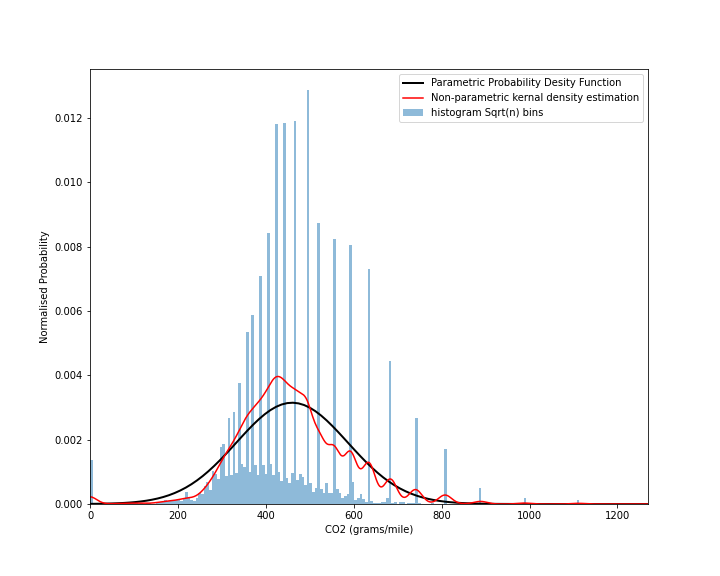


As observed in the begining of the lecture/ notebook several of the orignal data columns were actually catagorical. These included:
* year$^*$ 	
* make	
* model	
* fuelType	
* drive	

Let's examine what the 'emissions' data would look like if we split or group data by the type of traction a vechicle posses, the 'drive' series.



---
---
$^*$ while year is a numerical value, it operates as a 'catagory'. 





#### 2.0.1 Example of using the ```.groupby()``` fuction to split and aggregate a data set.

In [42]:
emission_by_drive_summary = simple_mpg.groupby("drive").co2TailpipeGpm.agg(
    mean ='mean',
    median = 'median',
    standerd_dev='std',
    skew ='skew',
    count ='count',
    min_emission='min',
    max_emission='max',
 ).copy()

emission_by_drive_summary

,mean,median,standerd_dev,skew,count,min_emission,max_emission
drive,,,,,,,
2-Wheel Drive,549.660421,555.437500,163.131110,-0.582435,507,0.000000,987.444444
4-Wheel Drive,472.166316,466.000000,90.664869,0.103117,2009,0.000000,829.000000
4-Wheel or All-Wheel Drive,552.347442,555.437500,105.767268,0.586839,6645,317.392857,987.444444
All-Wheel Drive,405.309710,412.000000,123.336000,-0.673412,4281,0.000000,979.000000
Front-Wheel Drive,375.162516,381.500000,77.782405,-0.983235,15018,0.000000,634.785714
Part-time 4-Wheel Drive,501.004175,494.000000,99.959623,-1.126687,402,0.000000,796.000000
Rear-Wheel Drive,516.410080,493.722222,118.864944,0.335464,14739,0.000000,1269.571429


## 2.1 One sample t-test- looking for sub-populations
We are building up to a statistical test to see if this catagorisation is statistically signifficat (ie they are quantitativly distinguishable) or these are just divisions of the data based on our classifactions.

One way to examine these sub-populations in the table above is to use the groupby() function to generate a series of boxplots.

#### 2.1.1 Example of using ```.groupby()``` with box plots

In [225]:
emissions_groups = simple_mpg.groupby('drive')['co2TailpipeGpm']

In [ ]:
for group in emissions_groups.groups:
    print(group)
    plt.figure()
    emissions_groups.get_group(group).plot.box()
    plt.title(group)


#### **notes** on custmizing the figure and sub plots
1) The ``` figsize``` keyword in matplotlib is given as (width, height) in the units of inches. For the purposes here I am just adjusting this 'on the fly' to get a reasonable proportion on my screen.  When you then save this figure it may need a difffernt ratio, and it also depends on the dpi setting.

2) the ```plt.ylim()```command in the plot below is to insure that all the plots have the same y-axis. I suggest commenting it out to see how it affects the interpitability of the data. We did similar above in 1.2.2 but on the x-axis.

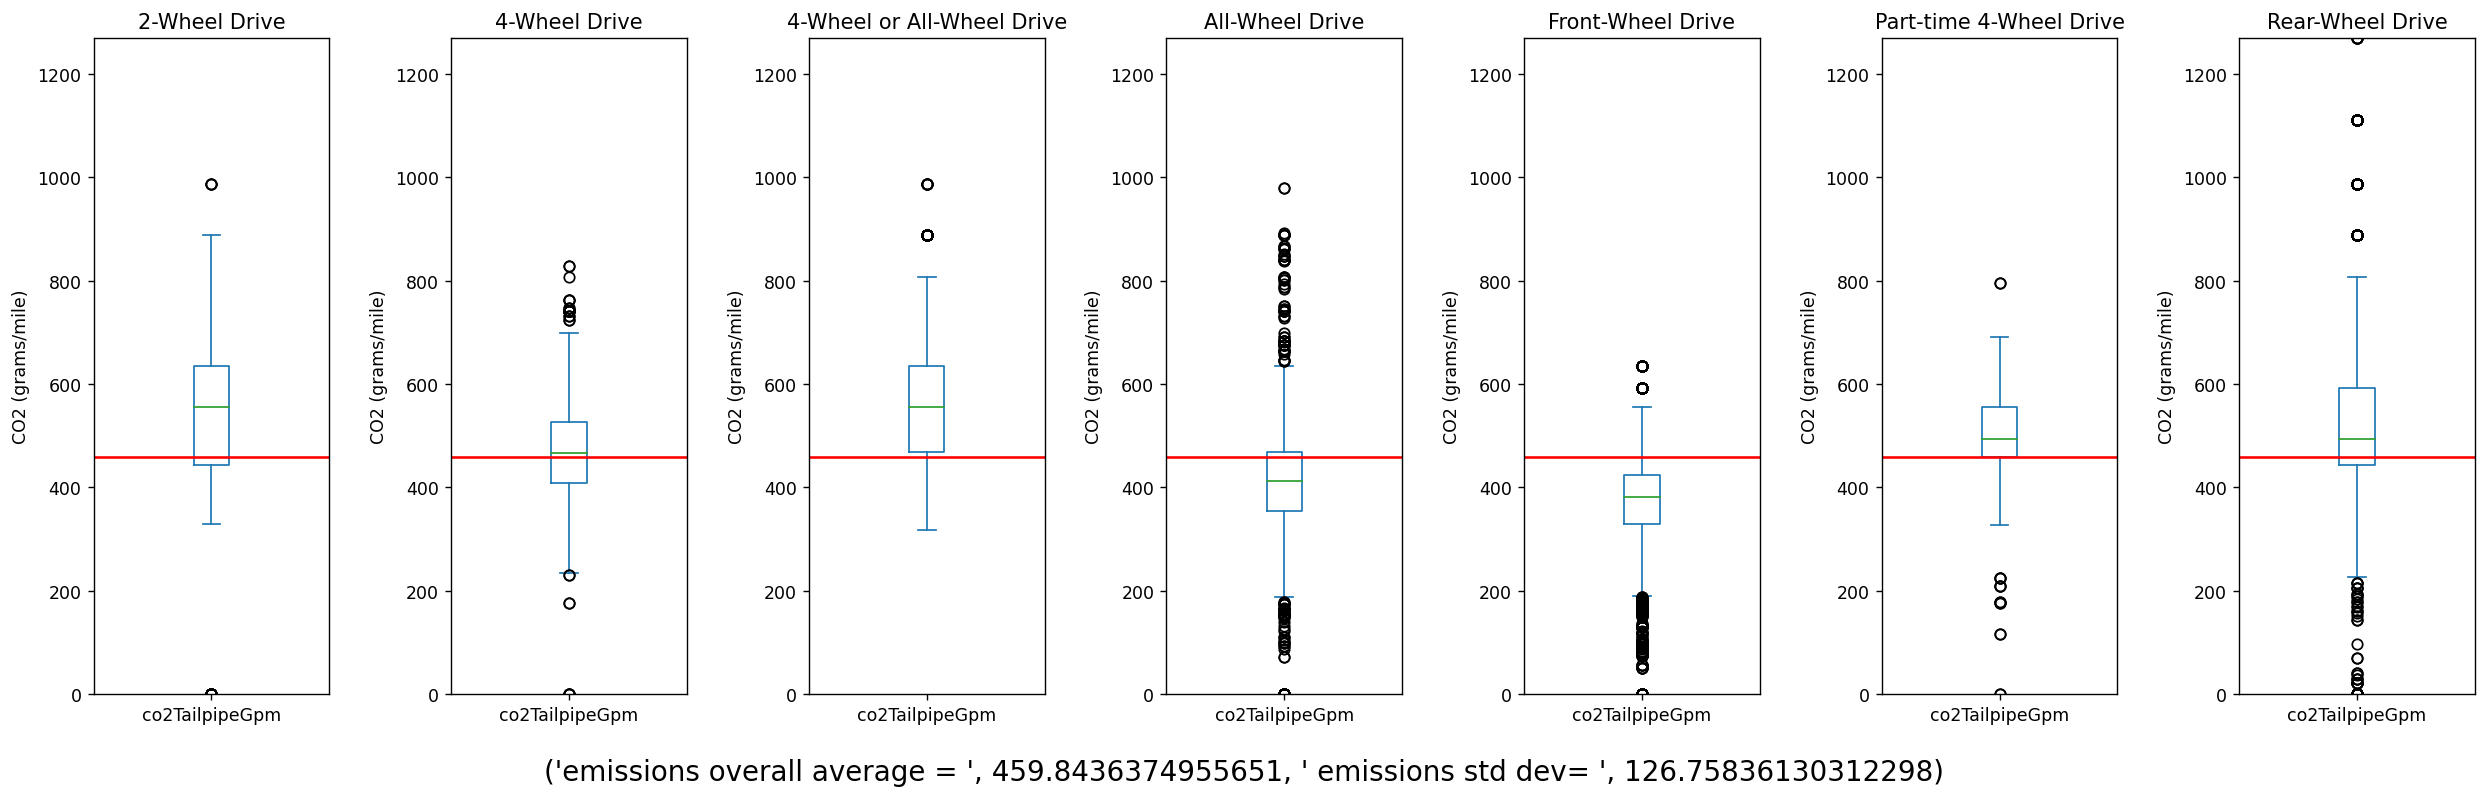

In [171]:

fig = plt.figure(1,figsize=(20,6))
for i,group in enumerate(emissions_groups.groups,1):

    fig.add_subplot(1,7,i,)
    emissions_groups.get_group(group).plot.box()
    plt.ylabel('CO2 (grams/mile)')
    plt.title(group)
    plt.ylim(simple_mpg['co2TailpipeGpm'].min(),simple_mpg['co2TailpipeGpm'].max())

    plt.axhline(simple_mpg['co2TailpipeGpm'].mean(),color= 'red')
caption='emissions overall average = ', emissions.mean(),' emissions std dev= ', emissions.std() 
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=16)

plt.tight_layout()
plt.show(1)

In [ ]:
emission_by_drive_summary.transpose()

drive,2-Wheel Drive,4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
mean,549.660421,472.166316,552.347442,405.309710,375.162516,501.004175,516.410080
median,555.437500,466.000000,555.437500,412.000000,381.500000,494.000000,493.722222
standerd_dev,163.131110,90.664869,105.767268,123.336000,77.782405,99.959623,118.864944
skew,-0.582435,0.103117,0.586839,-0.673412,-0.983235,-1.126687,0.335464
count,507.000000,2009.000000,6645.000000,4281.000000,15018.000000,402.000000,14739.000000
min_emission,0.000000,0.000000,317.392857,0.000000,0.000000,0.000000,0.000000
max_emission,987.444444,829.000000,987.444444,979.000000,634.785714,796.000000,1269.571429


### 2.1.2 One sample t-test



\begin{equation}
t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}}
\end{equation}
The parameters are:
* ${\bar {x}}$ measured sample mean.
* $\mu_0$ theoretical polulation mean (here we are testing the difference of the sub-population from the overall poulation)
* $s$ measured standard deviation of the sample
* $n$ sample size / number of measurments.

#### 2.1.3 One Sample Hypothesis testing

The equations above are all really very good, but the question is what is $t$ measureing?

**Answer** it tells us weither one of two hyptohesis's are true. 

* The **null hyptohesis** = $h_0$ asks if the mean of a sub-population is differnt from a theoretical / known mean of the overall population. 
** Example is the average emissions of the '2-wheel drive' catagory are signifficantly differnt from the overall average emissions of the all the vechicle types in the dataset.
** this is associated with a **large p-value** usually greater than 0.05. (we are willing to take a 5% risk of saying that the unknown population mean is different from know mean) 
* the **alternative hypothesis** = $h_1$, says that if the p-value is too small we must reject the null hypothesis
** if the p-value is less than 0.05 than we can not accept the null hypothesis of equal averages.

The **p-value** is calculated from $t$. traditionally this is done useing the steps outlined on this [descripton of the test from the JMP site](https://www.jmp.com/en_gb/statistics-knowledge-portal/t-test/one-sample-t-test.html). The traditional method relies on consulting printed tables. Modern software packeges take care of this for us. As in the example below.


#### 2.1.4 Example of one variable t-test against the population mean for all the catagories

In [ ]:
emissions.describe()

count    44787.000000
mean       459.843637
std        126.758361
min          0.000000
25%        386.391304
50%        444.350000
75%        522.764706
max       1269.571429
Name: co2TailpipeGpm, dtype: float64

In [ ]:
t_test=[]
for group in emissions_groups.groups:

  t,p = sci.stats.ttest_1samp(emissions_groups.get_group(group), emissions.mean())
  t_test.append((t,p))

t_test=np.asarray(t_test)

emission_by_drive_summary['t statistic']= t_test[:,0]
emission_by_drive_summary['p value']= t_test[:,1]

emission_by_drive_summary

,mean,median,standerd_dev,skew,count,min_emission,max_emission,t statistic,p value
drive,,,,,,,,,
2-Wheel Drive,549.660421,555.437500,163.131110,-0.582435,507,0.000000,987.444444,12.397231,5.249154e-31
4-Wheel Drive,472.166316,466.000000,90.664869,0.103117,2009,0.000000,829.000000,6.091946,1.333376e-09
4-Wheel or All-Wheel Drive,552.347442,555.437500,105.767268,0.586839,6645,317.392857,987.444444,71.294463,0.000000e+00
All-Wheel Drive,405.309710,412.000000,123.336000,-0.673412,4281,0.000000,979.000000,-28.930073,3.053141e-168
Front-Wheel Drive,375.162516,381.500000,77.782405,-0.983235,15018,0.000000,634.785714,-133.417034,0.000000e+00
Part-time 4-Wheel Drive,501.004175,494.000000,99.959623,-1.126687,402,0.000000,796.000000,8.255996,2.203854e-15
Rear-Wheel Drive,516.410080,493.722222,118.864944,0.335464,14739,0.000000,1269.571429,57.774884,0.000000e+00


#### 2.1.5 outcome of one variable t-test

Since all the p-values are below 0.05, none of these sub-populations can be assumed to possess a mean which is the same as the overall parent polulation.

This kind of confirms the insight that we gathered from our hitogram and theoretical distribution function explorations. 

Namely, the emissions data looks to actually be built up of several smaller populations.  

How well the 'drive' categoy works to explain this breakdown remains to be answered.




## 2.2  Paired two-sample  t-test

The method for testing the difference in the  sub-popluations is generically called a student t-test. 

Usually we think about this in terms of 'small' populations, but small is murky and just means not enough points to be certain that there is a difference between a known and theorised value.  

The method to determine this is a t test since we generate a test statistic, $t$ are at the real but **smaller** than true sample of the data. 

$t$ is the differnce between the measured population and the tehotretical true population. The test itself is given by this equation:
\begin{equation}
t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}
\end{equation}

For **equal** populations and similar variences $s_{p}$ takes the form:  
\begin{equation}
s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{X_{1}}^{2}+\left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}
\end{equation}

for Equal or unequal sample sizes, similar variances (1/2 < sX1/sX2 < 2), $s_{p}$ generalises as:

\begin{equation}
s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{X_{1}}^{2}+\left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}
\end{equation}

Finally, for **equal or unequal sample sizes**, and **unequal variances** (sX1 > 2sX2 or sX2 > 2sX1) the t-test  generalises to a Welch's t-test:
\begin{equation}
t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{\bar {\Delta }}}}
\end{equation}


\begin{equation}
s_{\bar {\Delta }}={\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}
\end{equation}

The parameters are:
* ${\bar {x}_{i}}$ are the measured sample means.
* $s_{i}$ measured standard deviations of the two populations being compared
* $n$ sample size / number of measurments also thought of as the **degrees of freedom**.




#### 2.2.1 Two variable Hypothesis testing

The equations above are all really very good, but the question is what is $t$ measureing?

**Answer** it tells us weither one of two hyptohesis's are true. 
* The first hypothesis, or the **null hyptohesis** = $h_0$ would be that the means of the two populations can not be measured to be different from one another.
** this is associated with a large **p-value** usually greater than 0.05.
* the second hypthesis, is the **alternative hypothesis** = $h_1$.
** if the p-value is less than 0.05 than we can not reject the null hypothesis of equal averages.

The **p-value** is calculated from $t$ by pluging into a cumulative distribution function.

Lucky for us, all this maths is kept 'under the hood' and we can simply call a function from the scipy libary to run the test.

Let's look at what that looks like.

#### 2.1.2 Example t-test between two different drive trains.

**note** in the first one we assume **equal** underlying **true** variences. In the second line we assume two **different** underlying variences.

In [ ]:
sci.stats.ttest_ind(emissions_groups.get_group('2-Wheel Drive'),emissions_groups.get_group('4-Wheel or All-Wheel Drive'),equal_var= True)

Ttest_indResult(statistic=-0.5263068125817365, pvalue=0.5986913750607255)

In [ ]:
sci.stats.ttest_ind(emissions_groups.get_group('2-Wheel Drive'),emissions_groups.get_group('4-Wheel or All-Wheel Drive'),equal_var= False)

Ttest_indResult(statistic=-0.3650756996827734, pvalue=0.7151981214953489)

In [ ]:
sci.stats.ttest_ind(emissions_groups.get_group('2-Wheel Drive'),emissions,equal_var= False)

Ttest_indResult(statistic=12.355079519305697, pvalue=7.029500520213096e-31)

#### 2.1.3 Conclusion of t-test

From either version of the t-test above we can see that the two drive trains produce statistically identical average emissions. 

So while we understand that catagorically, these are different popultaions, measurments of their emissions alone are not enough to differentiate these two populations.

#### 2.1.4 Comparing more than two groups

In week 4 we will generalise this appraoch further so that we can compare all 7 of the drive trains in parallel using a technique known as **Analysis of Varience** or **ANOVA**.

### 2.3 Exercices 

#### 2.3.1 Action Use the ``.groupby()``` to split and aggregate 

Select the column of the fuel economy data frame that you used in Action 1.3.4 to generate a summary data frame based on the split catagories.

#### 2.3.2 Action plot the differnt groups of data created in Action 2.3.1




#### 2.3.3 Action perform a one sample t-test

compare the 'group' to the column mean

#### 2.3.4 Action Perform a two sample t-test

Compate two of the groups from the column of your choice.

#### 2.2.5 Action Report your findings

a) Save off the figure and summary results of your analysis. 

b) Then share your findings on the forum where you initaly discussed the behaviour of the data in the histograms

[Moodle Forum](https://moodle.gla.ac.uk/mod/forum/view.php?id=2865134)

## 3.0 Other parameters, return of box plots and non-normal data.

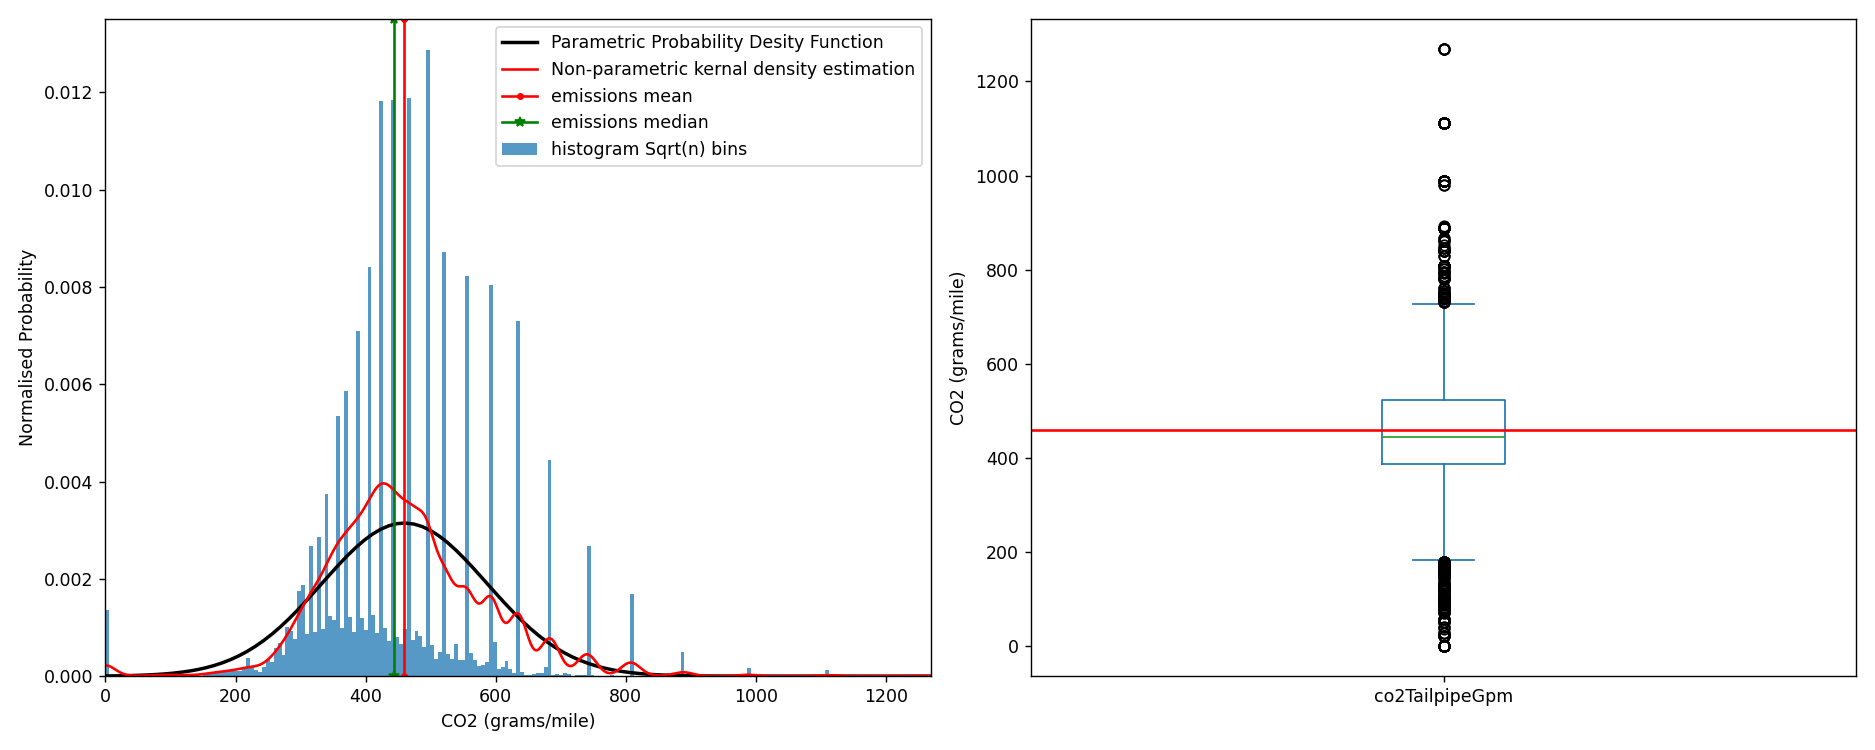


## 3.1 Defining Skew and Kurtosis

Re-examining the histogram and the box plot above we canobserve a few features in the emissions data.

**Skew** is the asymetry of a distribution of data.
* In the histogram and the non-parametric curve there is a noticeable shift or distortion ot the shape of the curve such that it is not perfectly symetrical around the average.
** note that the right hand side is a bit 'thicker' than the left.
** if you caclcualte this with ```emissions.skew()``` you will observe that this data set has a very small value of 0.29.
** Normal data tends to range between -1 and 1. 

Anther feature to notice is that in the box plot you can see that the emissions data has large number of outliers. This is called **kurtosis**.

* It is a measure of “tailedness” of a data distribution, describes whether data mostly exists in the tail (positive kurtosis) or the peak of a distribution (negative kurtosis).
** In the emissions data we can calcualte it to be 2.18, which shows again that this data is basically normal.
** There is a rough rule of thumb that says kurtosis should be between -3 and +3.

Both of these parameters can be used to help gain insight into if a problem shuld be addressed with parametric methods. However, a quick search of variouss lecture notes and literature will turn up that the recommend ranges for skew and kurtosis can vary widly. See this link the resources on this website [from the MRC at the University of Cambridge](https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon#:~:text=The%20values%20for%20asymmetry%20and,between%20%E2%80%907%20to%20%2B7.).



#### 3.1.1 some more rules of Thumb

Generally, if you need to decide weither or not to use parametric or non-parametric appraoches, you need some guidance. Here one normality test to try in the first instance:

**Is my variable well approximated by a normal distribution?**

* Skewness should be between -1 and +1 … **AND**
* Difference between Median and Mean should be smaller than 10% of the standard deviation … **AND**
* kurtosis should be between -3 and 3 **And**
* Histogram shows a good qualitative comparison to fitted normal distribution curve 

Lets see how the emissions dataset stacks up:



#### 3.1.2 Example of looking at the overall emissions data

In [172]:
print('mean=', emissions.mean()) 
print('median =',emissions.median(),)
print('expectation delta=',emissions.mean()-emissions.median())
print('10% of std dev =',emissions.std()*0.1) 
print('skew =',emissions.skew())
print('kurtosis =',emissions.kurtosis())

mean= 459.8436374955651
median = 444.35
expectation delta= 15.493637495565054
10% of std dev = 12.675836130312298
skew = 0.2958159346302193
kurtosis = 2.18130022909296


From the above quick inspection we see that in general the emissions data can generally be considered a normal distribution.

If anything the differnce between the mean and the median is a little high, but this does show the effect of the outliers on the distribution.

Let's examine each of the individual groups using these criteria. 

#### 3.1.3 Example of checking for normal behaviour within the emissions data group by 'drive'

In [226]:
emission_by_drive_summary = simple_mpg.groupby("drive").co2TailpipeGpm.agg(
    count ='count',

    
    mean ='mean',
    median = 'median',
    standerd_dev='std',
    skew ='skew'
    
 ).copy()

emission_by_drive_summary

,count,mean,median,standerd_dev,skew
drive,,,,,
2-Wheel Drive,507,549.660421,555.437500,163.131110,-0.582435
4-Wheel Drive,2009,472.166316,466.000000,90.664869,0.103117
4-Wheel or All-Wheel Drive,6645,552.347442,555.437500,105.767268,0.586839
All-Wheel Drive,4281,405.309710,412.000000,123.336000,-0.673412
Front-Wheel Drive,15018,375.162516,381.500000,77.782405,-0.983235
Part-time 4-Wheel Drive,402,501.004175,494.000000,99.959623,-1.126687
Rear-Wheel Drive,14739,516.410080,493.722222,118.864944,0.335464


now some functions do not work with the .agg() function so need to add these columns manually 

(**specifically** kurtosis does not work with.agg / .groupby, it is a documneted bug)

In [231]:
emis_kurt = []
sigma10 = []

for group in emissions_groups.groups:
  emis_kurt.append(emissions_groups.get_group(group).copy().kurtosis())

emission_by_drive_summary['kurtosis'] = emis_kurt

emission_by_drive_summary['expectation delta']= np.abs(emission_by_drive_summary['mean']-emission_by_drive_summary['median'])
emission_by_drive_summary['10% of sigma']=emission_by_drive_summary['standerd_dev']*0.10





emission_by_drive_summary

,count,mean,median,standerd_dev,skew,kurtosis,expectation delta,10% of sigma
drive,,,,,,,,
2-Wheel Drive,507,549.660421,555.437500,163.131110,-0.582435,2.033902,5.777079,16.313111
4-Wheel Drive,2009,472.166316,466.000000,90.664869,0.103117,1.402553,6.166316,9.066487
4-Wheel or All-Wheel Drive,6645,552.347442,555.437500,105.767268,0.586839,0.289054,3.090058,10.576727
All-Wheel Drive,4281,405.309710,412.000000,123.336000,-0.673412,3.753104,6.690290,12.333600
Front-Wheel Drive,15018,375.162516,381.500000,77.782405,-0.983235,3.252747,6.337484,7.778241
Part-time 4-Wheel Drive,402,501.004175,494.000000,99.959623,-1.126687,4.728228,7.004175,9.995962
Rear-Wheel Drive,14739,516.410080,493.722222,118.864944,0.335464,3.726060,22.687858,11.886494


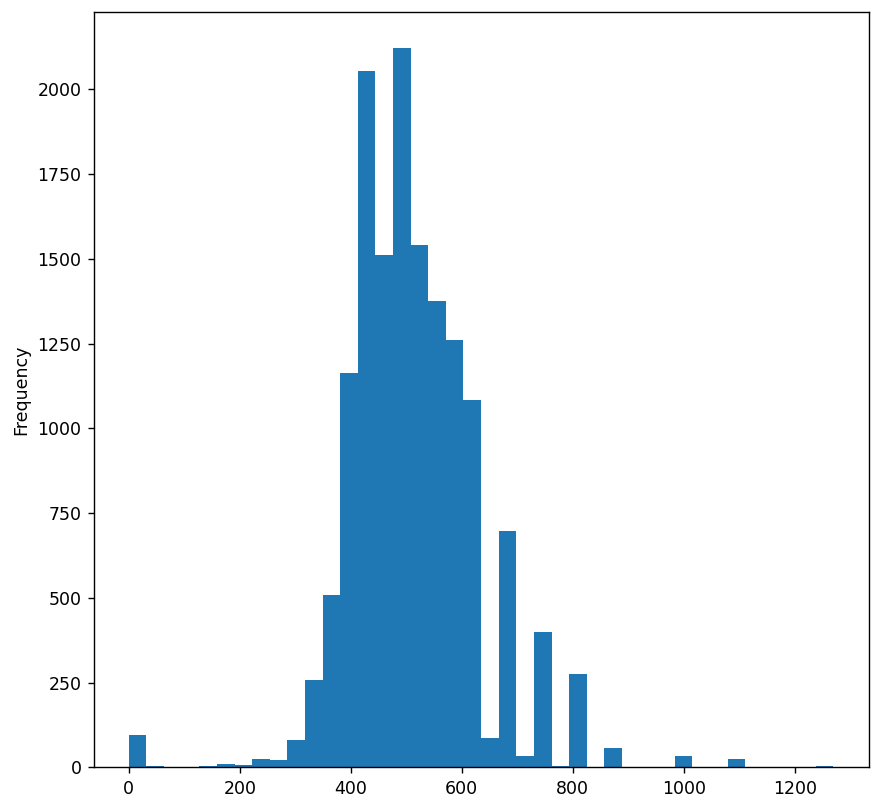

In [175]:
rwd= emissions_groups.get_group('Rear-Wheel Drive').copy()

fig=plt.figure(figsize=(8,8))
rwd.plot.hist(grid=False, bins =40)

From the table above we can see that all the data except 'Rear-wheel Drive' seems to be generally normal.

A quick inspection of the histogram shows that the seems to be the beginings of a bi-modal feature and again we see a large slope to the right hand side. Again the 'drive' does not really help explain why so more work needs to be done.



## 3.2.0 What to do if your data fails the normality tests

### 3.2.1 Transform the data
First see if transfroming it makes it look normal
* this can include performing a mathmatical transformation like squaring, square rooting, or applying a logarithm to the orignal data

If that did not help then you can still apply tests to understand the data but these are now **non-parametric** tests. (go to section 3.2) 


####3.2.2 Example of transforming data to see if becomes normal

Start by taking the log of the data

In [31]:

rwd2=np.log(rwd)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


see that this results in an error. 

Next lines of code demonstrate how to find 0's in the data set. In this case, since most electric vecicles are rear-wheel drive they have 0 emissions. so lets just drop them from the data for the purposes of testing.

In [35]:
rwd.loc[rwd==0]

23127    0.0
23128    0.0
23796    0.0
24456    0.0
24768    0.0
        ... 
38606    0.0
38607    0.0
38615    0.0
38618    0.0
38619    0.0
Name: co2TailpipeGpm, Length: 87, dtype: float64

In [36]:
len(rwd)

14739

In [51]:
rwd=rwd[rwd!=0]

rwd.loc[rwd==0]

Series([], Name: co2TailpipeGpm, dtype: float64)

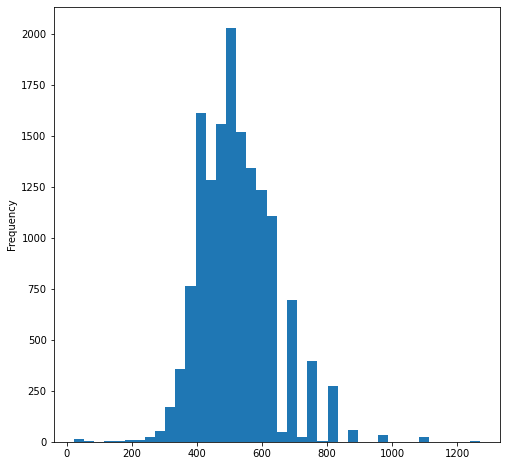

In [52]:
fig=plt.figure(figsize=(8,8))
rwd.plot.hist(grid=False, bins =40)

In [53]:
rwd2=np.log(rwd)

mean= 6.229162094809087
median = 6.201973055842311
expectation delta= 0.02718903896677638
10% of std dev = 0.02260900479305885
skew = -1.8707898495890984
kurtosis = 24.94038124196376


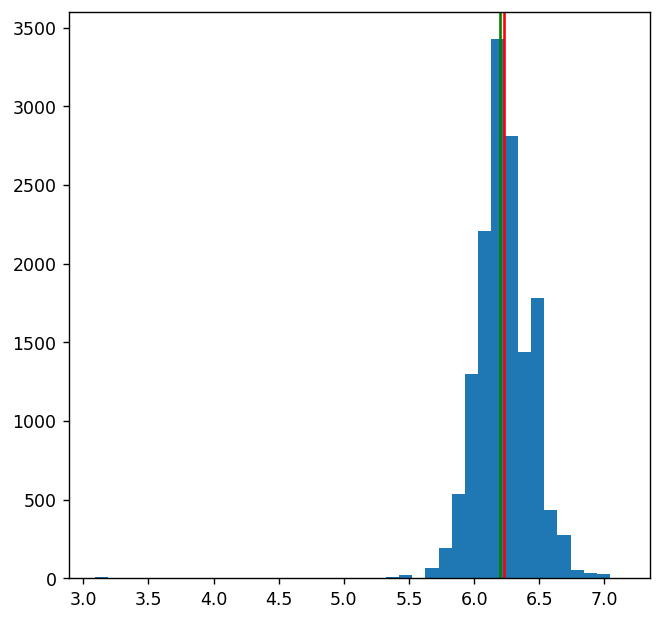

In [177]:
plt.figure(figsize=(6,6))
rwd2.hist(bins=40, grid=False)
plt.axvline(rwd2.median(),color='green')
plt.axvline(rwd2.mean(),color='red')

print('mean=', rwd2.mean()) 
print('median =',rwd2.median(),)
print('expectation delta=',rwd2.mean()-rwd2.median())
print('10% of std dev =',rwd2.std()*0.1) 
print('skew =',rwd2.skew())
print('kurtosis =',rwd2.kurtosis())

This transformation has addressed most of the non-normal behavior. We now see some exptreme tails in the low emissions. Further work would need to be done to address this, but again this could be vechicles such as hybrids.

### 3.2.3 Examine for bi-modal nature

Examine the histogram of average highway fuel consumption below.

1) note that it seems to have two peaks.

2) and transforming with a logarithm does not really improve it. In this case you can explore to see if it is bi-model.

What I have done below is create an estimated set of guassian's and tried to fit them to the data. There are other (read better) methods for doing this, but they are outside scope of the course.

#### 3.2.4 Example of fitting a pair of Guassians



In [194]:
highway =simple_mpg['highway08'].loc[(simple_mpg['year']==2002)].copy()

print(highway.min(),highway.max())

12 69


In [192]:
xmin, xmax = highway.min(),highway.max()
thy_range = np.linspace(xmin, xmax, len(highway))
thy_dist=sci.stats.norm.pdf(thy_range,highway.mean(),highway.std())

mean= 23.03076923076923
median = 23.0
expectation delta= 0.03076923076923066
10% of std dev = 0.5550873261586705
skew = 1.3955810403265956
kurtosis = 7.027158310733444


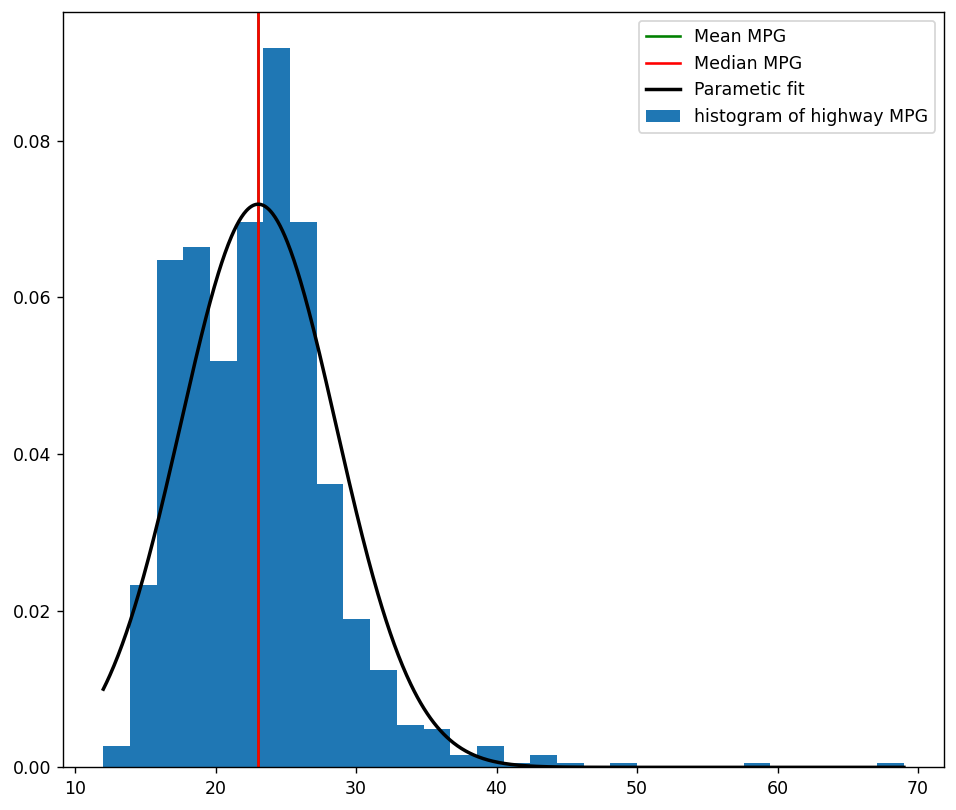

In [193]:
print('mean=', highway.mean()) 
print('median =',highway.median(),)
print('expectation delta=',highway.mean()-highway.median())
print('10% of std dev =',highway.std()*0.1) 
print('skew =',highway.skew())
print('kurtosis =',highway.kurtosis())

fig= plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.hist(highway, density=True, bins=30)
plt.axvline(highway.median(),color='green')
plt.axvline(highway.mean(),color='red')
plt.plot(thy_range,thy_dist,'k', linewidth=2)
plt.legend(['Mean MPG','Median MPG','Parametic fit', 'histogram of highway MPG'])

mean= 3.1098753194463784
median = 3.1354942159291497
expectation delta= -0.02561889648277127
10% of std dev = 0.023068767135973816
skew = 0.14754404038937868
kurtosis = 0.4528597418056086


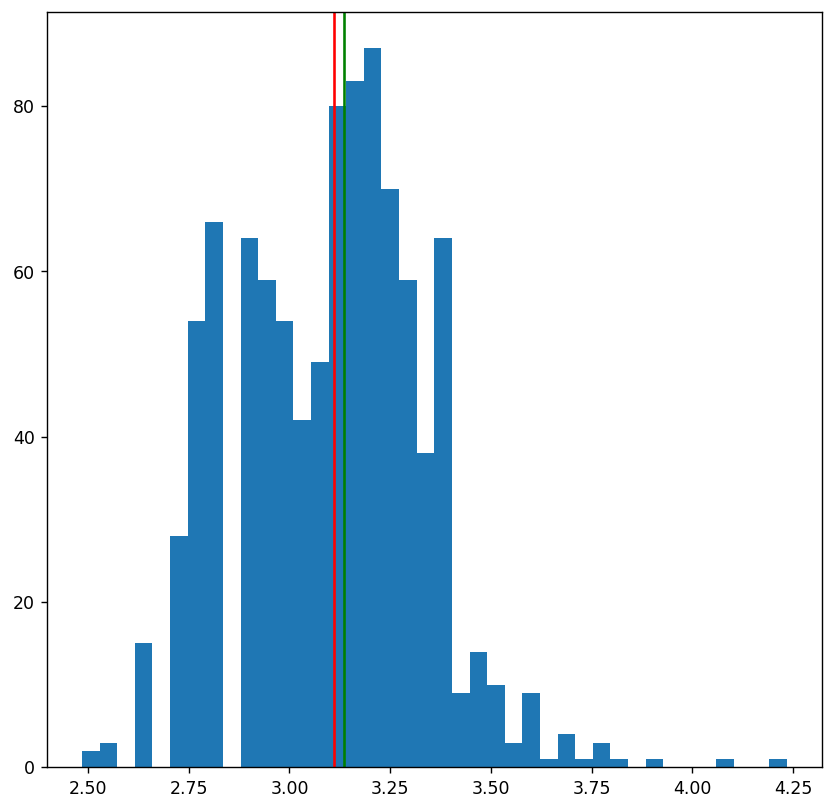

In [191]:
high_log=np.log(highway)

print('mean=', high_log.mean()) 
print('median =',high_log.median(),)
print('expectation delta=',high_log.mean()-high_log.median())
print('10% of std dev =',high_log.std()*0.1) 
print('skew =',high_log.skew())
print('kurtosis =',high_log.kurtosis())

fig= plt.figure(figsize=(8,8))
high_log.hist(bins=40, grid =False)
plt.axvline(high_log.median(),color='green')
plt.axvline(high_log.mean(),color='red')

In [216]:
thy_dist2=sci.stats.norm.pdf(thy_range,highway.mean()+1.5,highway.std()*0.7)

thy_dist3=sci.stats.norm.pdf(thy_range,highway.mean()-5,highway.std())

mean= 23.03076923076923
median = 23.0
expectation delta= 0.03076923076923066
10% of std dev = 0.5550873261586705
skew = 1.3955810403265956
kurtosis = 7.027158310733444


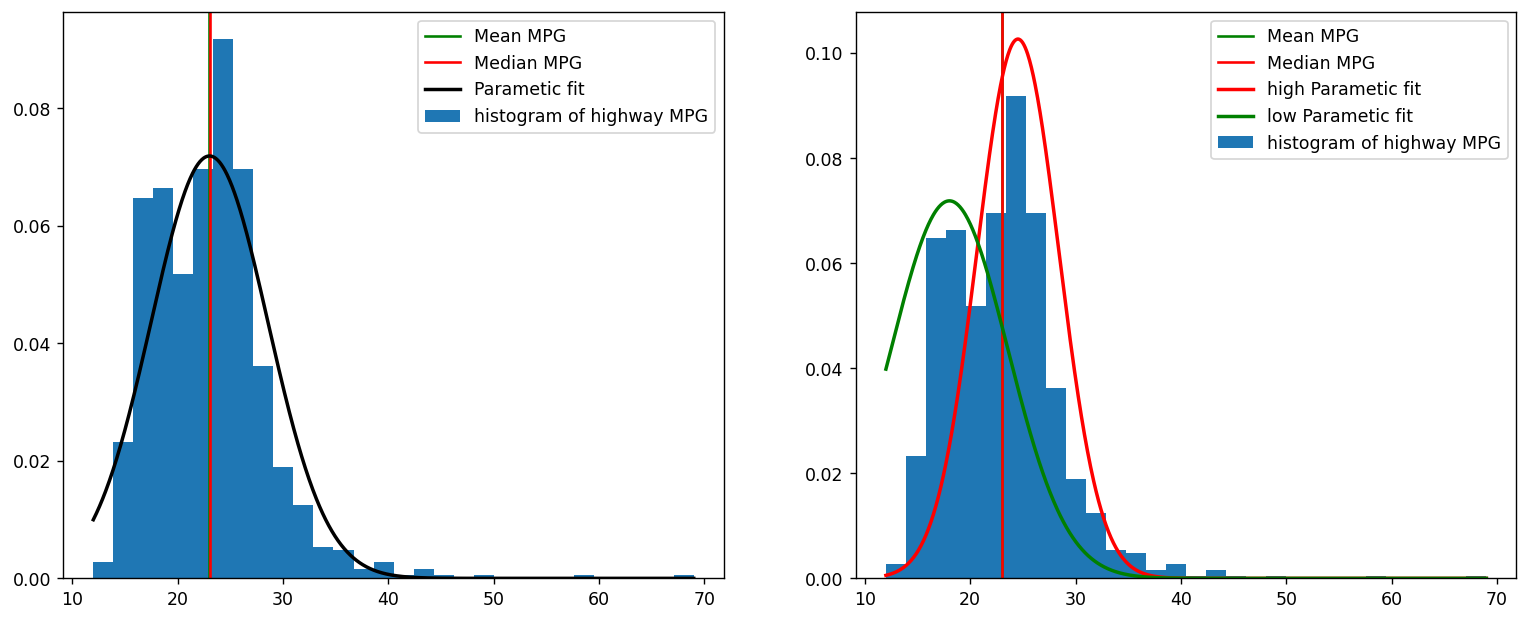

In [218]:
print('mean=', highway.mean()) 
print('median =',highway.median(),)
print('expectation delta=',highway.mean()-highway.median())
print('10% of std dev =',highway.std()*0.1) 
print('skew =',highway.skew())
print('kurtosis =',highway.kurtosis())

fig= plt.figure(figsize=(15,6))
fig.add_subplot(1,2,1)
plt.hist(highway, density=True, bins=30)
plt.axvline(highway.median(),color='green')
plt.axvline(highway.mean(),color='red')
plt.plot(thy_range,thy_dist,'k', linewidth=2)
plt.legend(['Mean MPG','Median MPG','Parametic fit', 'histogram of highway MPG'])

fig.add_subplot(1,2,2)
plt.hist(highway, density=True, bins=30)
plt.axvline(highway.median(),color='green')
plt.axvline(highway.mean(),color='red')
plt.plot(thy_range,thy_dist2,'red', linewidth=2)
plt.plot(thy_range,thy_dist3,'green', linewidth=2)

plt.legend(['Mean MPG','Median MPG','high Parametic fit','low Parametic fit', 'histogram of highway MPG'])

As you can see the two peaks seem to fit the two peaks in the data. Again this does not explain why. We would want to explore the other columns to see if we can discover some correlations which offer insights into this two peaked behaviour. 

Further, we will show how by leveraging more variables we can gain insights that are time-consuming to arrive at using standard multivariate approaches.

## 3.3 Non-parametric tests

Finally, if transforming data does not work there are several tests that can help offer insight into how to compare two populations of data.  These are often called rank- tests as they look at first sorting or **ranking** the data and then asking questions about how symmetrical these data sets are. In particualr these would be: 

*   Wilcoxson paird test ( [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#r996422d5c98f-4)) - tests weither a set of paired measuremnts are symmetrical around a central value. Can be used similar to a one sample t-test.
* Mann-Whitney U test ([scipy.stats.mannwhitneyu ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)) - similar to the Wilcoxson test, but now can be used in a similar fashion to a 2-sample t-test. 



### 3.4 Exercises

#### 3.4.1 Action using either the fuel consumption data (city or highway) or displacment data calculate the following:

* skew
* kurtosis
* difference between mean and median
* 10% of the the standard deviation

#### 3.4.2 Action on the same variable group the data by one of the catorgorical parameters and again calcualte the additional parameters.


#### 3.4.3 Action based on the resutling data frames, identify a sub-group which does not obey normal distribution, then transform this data to see if that makes it appear normal.

#### 3.4.5 Action produce a plot demonstrating how the data does not fit a normal distribution

The plot can be a box plot,a histogram or both ( other?) and suggest your ideas on the forum as to what causes could be driving this behavior as well as what evidence you have to support this hypothesis

[Moodle Forum](https://moodle.gla.ac.uk/mod/forum/view.php?id=2865134)